In [1]:
import warnings
warnings.filterwarnings("ignore")

from jqdatasdk import *
auth('18810883096', 'Ww19930921')
# 查询是否连接成功
is_auth = is_auth()

提示：当前环境pandas版本为0.25，get_price与get_fundamentals_continuously接口panel参数将固定为False
注意：0.25以上版本pandas不支持panel，如使用该数据结构和相关函数请注意修改
auth success 


In [2]:
#兖洲煤业 600188
get_industry("000333.XSHE", date=None)

{'000333.XSHE': {'sw_l1': {'industry_code': '801110',
   'industry_name': '家用电器I'},
  'sw_l2': {'industry_code': '801111', 'industry_name': '白色家电II'},
  'sw_l3': {'industry_code': '851112', 'industry_name': '空调III'},
  'zjw': {'industry_code': 'C38', 'industry_name': '电气机械和器材制造业'},
  'jq_l2': {'industry_code': 'HY449', 'industry_name': '家用电器指数'},
  'jq_l1': {'industry_code': 'HY004', 'industry_name': '可选消费指数'}}}

In [3]:
# 煤炭行业的成分股
sw_id='801110'
stocks = get_industry_stocks(sw_id)
print(stocks)

['000016.XSHE', '000333.XSHE', '000404.XSHE', '000521.XSHE', '000651.XSHE', '000801.XSHE', '000810.XSHE', '000921.XSHE', '002011.XSHE', '002032.XSHE', '002035.XSHE', '002050.XSHE', '002052.XSHE', '002242.XSHE', '002290.XSHE', '002403.XSHE', '002418.XSHE', '002420.XSHE', '002429.XSHE', '002473.XSHE', '002508.XSHE', '002519.XSHE', '002543.XSHE', '002614.XSHE', '002668.XSHE', '002676.XSHE', '002677.XSHE', '002705.XSHE', '002723.XSHE', '002759.XSHE', '002848.XSHE', '002860.XSHE', '002959.XSHE', '300160.XSHE', '300217.XSHE', '300247.XSHE', '300249.XSHE', '300272.XSHE', '300342.XSHE', '300403.XSHE', '300475.XSHE', '300824.XSHE', '600060.XSHG', '600336.XSHG', '600619.XSHG', '600690.XSHG', '600839.XSHG', '600854.XSHG', '600983.XSHG', '603355.XSHG', '603366.XSHG', '603519.XSHG', '603551.XSHG', '603578.XSHG', '603579.XSHG', '603657.XSHG', '603677.XSHG', '603726.XSHG', '603868.XSHG', '603996.XSHG']


In [4]:
stock_name={}
for stock in stocks:
    stock_name[stock]=get_security_info(stock).display_name

In [5]:
# 获取一支股票
start_date="2019-09-19"
end_date="2020-09-20"

df_dict={}
for stock in stocks:
    df_dict[stock] = get_price(stock, start_date=start_date, end_date=end_date,fq="pre") # 获得000001.XSHG的2015年12月1号14:00-2015年12月2日12:00的分钟数据
print("load data")

load data


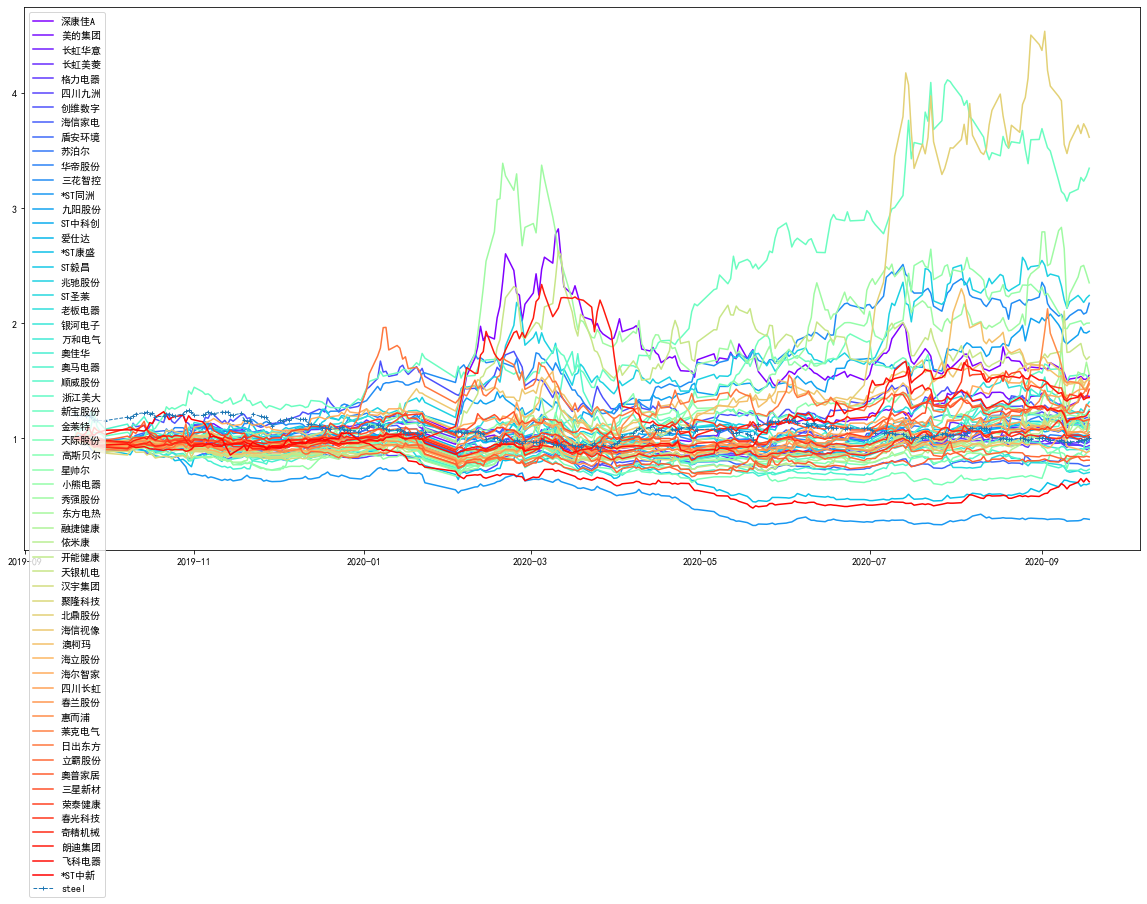

In [6]:
#coding:utf-8
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

import numpy as np

x = np.linspace(0, 1, 100)
number = len(stocks)
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

plt.rcParams['figure.figsize'] = (20.0, 10.0) # 显示大小
for i, stock in enumerate(stocks):
    df=df_dict[stock].dropna()
    plt.plot(df['close']/df['close'][0],color=colors[i],label=stock_name[stock])
    
df_indus = finance.run_query(
    query(finance.SW1_DAILY_PRICE).filter(
        finance.SW1_DAILY_PRICE.code == sw_id,
        finance.SW1_DAILY_PRICE.date >= start_date,
        finance.SW1_DAILY_PRICE.date <= end_date).order_by(
        finance.SW1_DAILY_PRICE.date.desc()).limit(1000))
plt.plot(list(df_dict[stock].T),df_indus['close']/df_indus['close'].values[-1],marker='+', linestyle='--', linewidth=1, markersize=4,label="steel")
plt.legend()

In [7]:
import pandas as pd
stock_return={}
for stock in stocks:
    df=df_dict[stock].dropna()
    stock_return[stock]=(df['close']/df['close'][0]).values[-1]
df_stock=pd.DataFrame({'name':stock_name,
       'return':stock_return})
df_stock.sort_values(by="return",inplace=True,ascending=False)
print(df_indus["close"].values[0]/df_indus["close"].values[-1])
print(df_stock)


1.2120228926125767
              name    return
300824.XSHE   北鼎股份  3.618203
002705.XSHE   新宝股份  3.348856
300160.XSHE   秀强股份  2.352941
002429.XSHE   兆驰股份  2.243243
002050.XSHE   三花智控  2.175421
002959.XSHE   小熊电器  2.003426
002242.XSHE   九阳股份  1.931818
300342.XSHE   天银机电  1.708700
300217.XSHE   东方电热  1.556738
000016.XSHE   深康佳A  1.553047
600336.XSHG    澳柯玛  1.530612
600060.XSHG   海信视像  1.520045
002677.XSHE   浙江美大  1.502297
603355.XSHG   莱克电气  1.498491
300475.XSHE   聚隆科技  1.480132
600983.XSHG    惠而浦  1.477273
600690.XSHG   海尔智家  1.466452
603579.XSHG   荣泰健康  1.428734
000333.XSHE   美的集团  1.365986
603868.XSHG   飞科电器  1.356182
002508.XSHE   老板电器  1.317544
603366.XSHG   日出东方  1.276256
002614.XSHE    奥佳华  1.250814
603726.XSHG   朗迪集团  1.235346
002860.XSHE    星帅尔  1.204564
300247.XSHE   融捷健康  1.196774
000921.XSHE   海信家电  1.184071
002420.XSHE   ST毅昌  1.175287
600854.XSHG   春兰股份  1.167089
603578.XSHG   三星新材  1.164835
300403.XSHE   汉宇集团  1.164311
000810.XSHE   创维数字  1.124726
002723.XSHE    金莱特  1.12

In [8]:
#print(df_dict["002110.XSHE"])
